# Portfolio Methodolgy

1. DGI/Growth Names - Rebalance every 6 months picking around 2 - 3 names from CA and US universe
    - Sell Covered Calls on names and re-enter if called away.
    - **GTC Stop Limit of 5% on each name**
2. VAA/PAA - Rebalance every month on trading day 1
3. LEAPS - Rebalance every 3 months picking around 3 - 8 names from US universe (high growth potential names)
    - Current Holdings: LOPE STOR PNW SBUX
    - LOPE Earnings: Nov 8
    - PNW Earnings: Nov 8
    - SBUX Earnings: Jan 23
        - **Exit Criteria: When the call option drops below 60 delta**
4. Short Vol - Short SPX Spreads at the beginning of the month and hold until second or last week to maturity
    - Potentially long UVXY/VXX puts at beginning of the month with bracket orders
    - **Short ATM SPX Put spreads around 25 points wide**
        - **Long bi-weekly unit puts, around -7% or so of SPX spot (or something with a cost of 15% of the credit)**
        - **The SPX put spread will have a capped max loss of 2,500 per contract, while in low volatility, the bi-weekly units are severely underpriced and will explode 10X to 20X in value if the long strike in the spread gets tested. Vega and Gamma play a huge factor in the repricing of these units.**
        - Initiate the units every 2 weeks letting them run to expiry
    - ***When in lower vol environment or when skew is less pronounced in high vol environments, it is possible to select spreads and units with the same expiry and still receive a deccent net credit. Otherwise, when IV is very high, check if same expiries are possible, otherwise choose units that expire in half the time.***
5. Barbell Hedging
    - Long SPX puts or VIX calls during high crisis potential moments
        - Initiate bracket orders with SPX Puts: +/- 30% of Cost Basis
    - Check VIX Futures volume trends and see impact of Feb 5, 2018
    - Only trade 4 naked SPX puts in Reg accounts
        - Sell half into profits/losses 
    - Only trade 6 3:1 Put back ratios in Reg Account: Leg into these positions because of how illiquid the market is
    - Take losses immediately (10% - 30% of Cost Basis)
    - NEVER EVER try to put on a position of the market is illiquid: YOU WILL get filled at horrible prices
    - **Put on 1-5 Delta strangles on the open of the day and close position at the end of the day around 2 pm to 3 pm**
6. Treasuries - Re-establish monthly bills beginning of month or at maturity
7. Earnings
    - Filter stocks with market cap > 500M and with post-earnings returns greater than 2% in magnitude for at least 3 quarters
    - Then filter stocks whose options have bid-ask spreads less than 1 dollar ATM
    - Aggregate all insider share buys and sells and calculate the ratio Buy/Sells
        - Candidates for Puts have Buy/Sell < 0.5
        - Candidates for Calls have Buy/Sell > 2

##### Strategy Weights
|Strategy|Weight|Last Rebal|Next Check|Next Full Rebal|
|-|-|-|-|-|
|VAA/PAA|25%|11/01/2018|12/01/2018|12/01/2018|
|LEAPs|5%|11/01/2018|12/01/2018|01/01/2019|
|Short Vol|2%|NA|NA|NA|
|Barbell Hedging|1.5%|11/06/2018|11/09/2018|11/19/2018|
|Treasuries|60%|11/01/2018|11/29/2018|12/01/2018|

## Key Modules to Run

- fundamental_data_collect.py to run monthly to collected latest financial statements and key stats from yahoo
- finstatement_cleaning.py to run right after fundamental_data_collect.py to create cleaned data for earnings plays



In [1]:
# Importing necessary models
import warnings
warnings.filterwarnings('ignore')

import smtplib
import pandas as pd
import numpy as np
import datetime as dt
import pandas.stats.moments as st
import time
%matplotlib inline
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

import os
main_dir = os.getcwd()

os.chdir('C:\\Users\\Fang\\Desktop\\Python Trading\\Trading\\Trading\\Modules\\DataCollection')

from alphavantage import *
from yahoo_query import *
from option_slam_earnings import *
from reuters_query import reuters_query
from alphaquery import alphaquery

os.chdir('C:\\Users\\Fang\\Desktop\\Python Trading\\Trading\\Trading\\Modules\\Options')
from optionsFunctions import *

os.chdir('C:\\Users\\Fang\\Desktop\\Python Trading\\Trading\\Trading\\Modules\\Earnings')
from yahoo_earnings import *
from lookup_earnings import lookup_earnings

os.chdir('C:\\Users\\Fang\\Desktop\\Python Trading\\Trading\\Trading\\Modules\\Processing')
from hv_calc import *

os.chdir(main_dir)

# Allocate Smartly Checking

In [2]:
# Short Call Assignment Price - 287.5

portfolio_value =  200000

as_lst = ['DBC',
        'HYG',
        'IEF',
        'IWM',
        'LQD',
        'QQQ',
        'SPY',
        'VNQ']
as_wgt = [0.014,
        0.014,
        0.417,
        0.014,
        0.500,
        0.014,
        0.014,
        0.014]

as_df = pd.DataFrame({'Allocation': as_wgt}, index = as_lst)
curr_spot = curr_batch_quotes(as_lst)
as_df = pd.concat([as_df,curr_spot[['price']]], axis = 1)

as_df['Market Value'] = portfolio_value*as_df.Allocation
as_df['Holdings'] = np.round(as_df['Market Value']/as_df.price,0)

as_df

,Allocation,price,Market Value,Holdings
symbol,,,,
DBC,0.014,15.310,2800.0,183.0
HYG,0.014,83.600,2800.0,33.0
IEF,0.417,101.775,83400.0,819.0
IWM,0.014,152.570,2800.0,18.0
LQD,0.500,111.460,100000.0,897.0
QQQ,0.014,169.420,2800.0,17.0
SPY,0.014,276.470,2800.0,10.0
VNQ,0.014,82.020,2800.0,34.0


## Checking market correlations

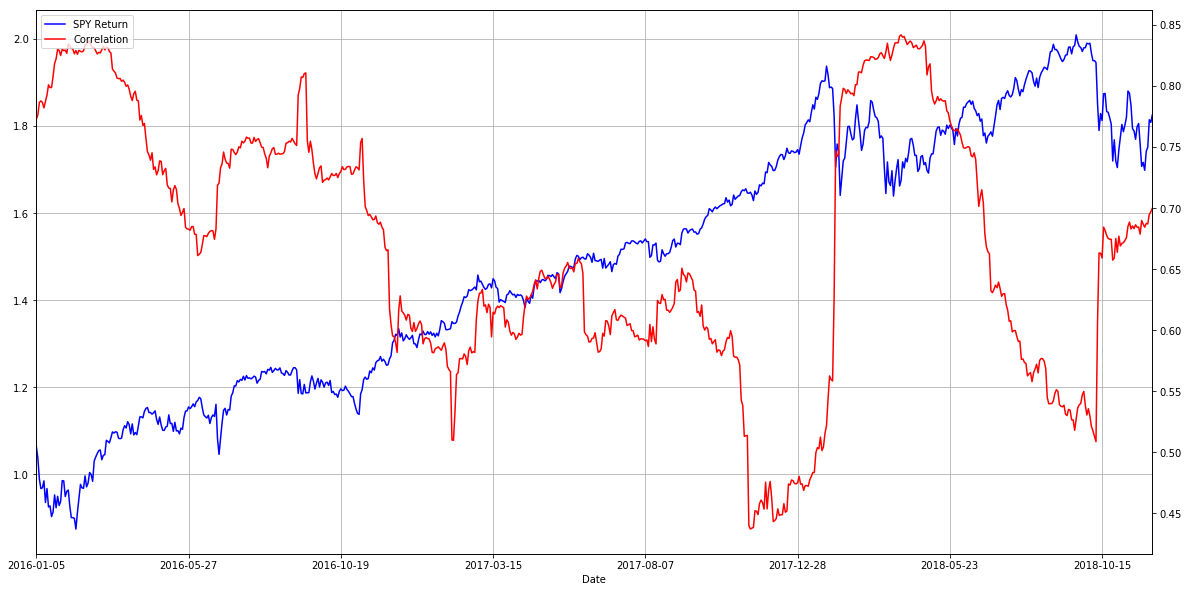

                XLRE       XLV       XLI       XLU       XLB       XLK  \
2018-11-26  0.401496  0.903008  0.877430  0.050592  0.795702  0.929117   
2018-11-27  0.403617  0.901434  0.875900  0.056553  0.783248  0.928968   
2018-11-28  0.415836  0.912305  0.885509  0.050604  0.790911  0.934271   
2018-11-29  0.418587  0.913073  0.890752  0.055456  0.790964  0.934909   
2018-11-30  0.425289  0.904943  0.893539  0.071281  0.792779  0.935379   

                 XLP       XLY       XLE       XLF  Avg_Corr   SPY_cum  
2018-11-26  0.444210  0.911170  0.742095  0.818939  0.687376  1.741832  
2018-11-27  0.447309  0.911982  0.742484  0.818700  0.687019  1.751057  
2018-11-28  0.458347  0.919751  0.750703  0.829972  0.694821  1.814401  
2018-11-29  0.467654  0.921579  0.747554  0.829033  0.696956  1.808251  
2018-11-30  0.472589  0.922085  0.750079  0.829723  0.699768  1.825368  


In [3]:
rolling_window = 60
plot_window = 10000

corr_df, sector_df = check_mkt_corr(rolling_window, plot_window)
print(corr_df.tail())

In [4]:
((sector_df.dropna() + 1).cumprod()-1).tail()

,SPY,XLRE,XLV,XLI,XLU,XLB,XLK,XLP,XLY,XLC,XLE,XLF
2018-11-26,-0.029038,0.048889,0.066580,-0.040830,0.084479,-0.078133,-0.082598,0.074422,-0.066828,-0.121898,-0.132058,-0.029982
2018-11-27,-0.025771,0.054603,0.077657,-0.042469,0.092648,-0.089417,-0.080778,0.084019,-0.064054,-0.119095,-0.134466,-0.029250
2018-11-28,-0.003339,0.063175,0.103582,-0.019528,0.091851,-0.075398,-0.048579,0.093028,-0.036411,-0.100681,-0.119615,-0.010603
2018-11-29,-0.005517,0.064444,0.107235,-0.018981,0.091452,-0.068730,-0.057819,0.094790,-0.040884,-0.097678,-0.113861,-0.019013
2018-11-30,0.000544,0.074603,0.129743,-0.009422,0.107591,-0.066336,-0.048859,0.101841,-0.033906,-0.099079,-0.115467,-0.013894


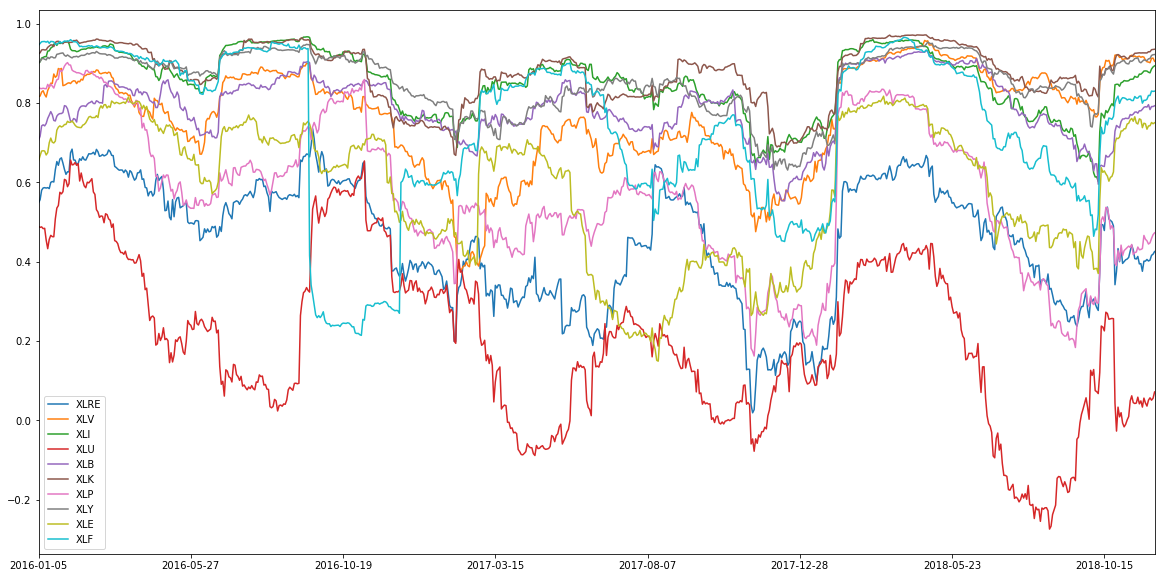

In [5]:
corr_df.iloc[:,:-2].plot(figsize = (20,10))

## Earnings

In [ ]:
date_lookup = '2018-11-21'

curr_earnings = date_earnings(date_lookup)
curr_earnings = curr_earnings[curr_earnings['Call Time'].isin(['After Market Close', 'Before Market Open'])]
curr_earnings['EarningsDate'] = date_lookup


In [6]:
month = 12
year = 2018
days_list = list(range(3, 7))

week_earnings = []

for i in days_list:
    date_lookup = '{0}-{1}-{2}'.format(year,month,'0'+(str(i)))
    curr_earnings = date_earnings(date_lookup)
    curr_earnings = curr_earnings[curr_earnings['Call Time'].isin(['After Market Close', 'Before Market Open'])]
    curr_earnings['EarningsDate'] = date_lookup
    week_earnings.append(curr_earnings)
    
curr_earnings = pd.concat(week_earnings,axis = 0)

focus_names = []
max_spread = 1

for ticker in curr_earnings.index:
    try:
        curr_options = all_options(ticker, 100, 1)
    except:
        curr_options = []
    
    if len(curr_options) == 0:
        continue
    elif (curr_options['Ask'] - curr_options['Bid']).mean() <= max_spread:
        focus_names.append(ticker)
    else:
        continue
        
curr_earnings = curr_earnings[curr_earnings.index.isin(focus_names)]

In [7]:
acs = curr_earnings[curr_earnings['Call Time'] == 'After Market Close']
bcs = curr_earnings[curr_earnings['Call Time'] == 'Before Market Open']
curr_earnings

,Call Time,EPS Estimate,Name,EarningsDate
ASNA,After Market Close,0.04,Ascena Retail Group Inc,2018-12-03
COUP,After Market Close,-0.03,Coupa Software Inc,2018-12-03
FNSR,Before Market Open,0.22,Finisar Corp,2018-12-03
USAT,Before Market Open,0.02,USA Technologies Inc,2018-12-03
HOME,After Market Close,0.15,At Home Group Inc,2018-12-04
TOL,After Market Close,1.83,Toll Brothers Inc,2018-12-04
HPE,After Market Close,0.43,Hewlett Packard Enterprise Co,2018-12-04
DG,Before Market Open,1.26,Dollar General Corp,2018-12-04
CONN,Before Market Open,0.58,Conn's Inc,2018-12-04
DCI,Before Market Open,0.57,Donaldson Company Inc,2018-12-04


In [8]:
acs 

,Call Time,EPS Estimate,Name,EarningsDate
ASNA,After Market Close,0.04,Ascena Retail Group Inc,2018-12-03
COUP,After Market Close,-0.03,Coupa Software Inc,2018-12-03
HOME,After Market Close,0.15,At Home Group Inc,2018-12-04
TOL,After Market Close,1.83,Toll Brothers Inc,2018-12-04
HPE,After Market Close,0.43,Hewlett Packard Enterprise Co,2018-12-04
CMTL,After Market Close,-0.06,Comtech Telecommunications Corp,2018-12-04
MRVL,After Market Close,0.32,Marvell Technology Group Ltd,2018-12-04
GWRE,After Market Close,0.2,Guidewire Software Inc,2018-12-04
MDB,After Market Close,-0.4,MongoDB Inc,2018-12-04
LULU,After Market Close,0.69,Lululemon Athletica Inc,2018-12-05


In [9]:
bcs

,Call Time,EPS Estimate,Name,EarningsDate
FNSR,Before Market Open,0.22,Finisar Corp,2018-12-03
USAT,Before Market Open,0.02,USA Technologies Inc,2018-12-03
DG,Before Market Open,1.26,Dollar General Corp,2018-12-04
CONN,Before Market Open,0.58,Conn's Inc,2018-12-04
DCI,Before Market Open,0.57,Donaldson Company Inc,2018-12-04
MOV,Before Market Open,1.12,Movado Group Inc,2018-12-04
KLXI,Before Market Open,1.15,KLX Inc,2018-12-04
AEO,Before Market Open,0.48,American Eagle Outfitters Inc,2018-12-05
GIII,Before Market Open,1.81,G-III Apparel Group Ltd,2018-12-05
CIEN,Before Market Open,0.48,Ciena Corp,2018-12-05


In [10]:
start_time = time.time()

start_date = dt.datetime(2018,1,1)

earnings_data = lookup_earnings(focus_names, start_date)

print("--- %s seconds ---" % (time.time() - start_time))

2.63% Completed
5.26% Completed
7.89% Completed
10.53% Completed
13.16% Completed
No revenues for TOL
15.79% Completed
No revenues for HPE
18.42% Completed
No revenues for DG
21.05% Completed
23.68% Completed
No revenues for DCI
26.32% Completed
28.95% Completed
31.58% Completed
No revenues for MOV
34.21% Completed
36.84% Completed
No growth_summary for MDB
No revenues for AEO
39.47% Completed
42.11% Completed
44.74% Completed
No revenues for HRB
47.37% Completed
50.00% Completed
52.63% Completed
55.26% Completed
No revenues for GEF
57.89% Completed
60.53% Completed
No revenues for KFY
63.16% Completed
No insiders_txns for MOMO
65.79% Completed
68.42% Completed
71.05% Completed
73.68% Completed
76.32% Completed
78.95% Completed
No revenues for KR
81.58% Completed
No revenues for MEI
84.21% Completed
86.84% Completed
--- 270.3505139350891 seconds ---


In [11]:
#################### Preliminary Name Selection ###################################
summary_df = earnings_data[1]
summary_df = summary_df[summary_df['Market Cap(Mil.)'] > 500].sort_values('Market Cap(Mil.)')

eps_df = earnings_data[0]
eps_df = eps_df[eps_df.Underlying.isin(summary_df.index)]
eps_df['NegativeSurprise'] = eps_df['surprisePercent'] < 0 
eps_df['PositiveSurprise'] = eps_df['surprisePercent'] > 0
eps_df['returnDifferentFromEPS'] = eps_df['surprisePercent']*eps_df['Stock_closeToOpen'] < 0
eps_df['LargeMoves'] = abs(eps_df['Stock_closeToOpen']) > 0.02

eps_corr = eps_df[['Underlying','NegativeSurprise',
                   'PositiveSurprise',
                   'returnDifferentFromEPS']].groupby('Underlying').sum()
eps_corr['surpriseReturnCorrelation'] = np.nan
corrs = []
for ticker in eps_corr.index:
    curr_corr = eps_df[eps_df['Underlying'] == ticker]
    corrs.append(curr_corr[['surprisePercent','Stock_closeToOpen']].corr().iloc[0,1])
eps_corr['surpriseReturnCorrelation'] = corrs
eps_corr['LargeMoves'] = eps_df[['Underlying','LargeMoves']].groupby('Underlying').sum()

selected_names = eps_corr[eps_corr['LargeMoves'] > 2].index.tolist()

#################### Filtering on Preliminary Name Selection ###################################
summary_df = summary_df[summary_df.index.isin(selected_names)]

eps_df = eps_df[eps_df.Underlying.isin(summary_df.index)]
eps_corr = eps_corr[eps_corr.index.isin(summary_df.index)]

scores_df = earnings_data[2]
scores_df = scores_df[scores_df.index.isin(summary_df.index)]
scores_df['TotalScore'] = scores_df.mean(axis = 1)
scores_df = scores_df.sort_values('TotalScore')

analyst_df = earnings_data[3]
analyst_df = analyst_df[analyst_df.index.isin(summary_df.index)]

valuations_df = earnings_data[4]
valuations_df = valuations_df[valuations_df.Underlying.isin(summary_df.index)]

growthrate_df = earnings_data[5]
growthrate_df = growthrate_df[growthrate_df.Underlying.isin(summary_df.index)]

profitability_df = earnings_data[6]
profitability_df = profitability_df[profitability_df.Underlying.isin(summary_df.index)]

finstrength_df = earnings_data[7]
finstrength_df = finstrength_df[finstrength_df.Underlying.isin(summary_df.index)]

perf_df = earnings_data[8]
perf_df = perf_df[perf_df.Underlying.isin(summary_df.index)]

rev_revisions_df = earnings_data[9]
rev_revisions_df = rev_revisions_df[rev_revisions_df.Underlying.isin(summary_df.index)]

earnings_revisions_df = earnings_data[10]
earnings_revisions_df = earnings_revisions_df[earnings_revisions_df.Underlying.isin(summary_df.index)]

insider_trades = earnings_data[11]
insider_trades = insider_trades[insider_trades.Underlying.isin(summary_df.index)]
insider_trades['Trading Date'] = pd.to_datetime(insider_trades['Trading Date'])
def aggregate_txns_date(trade_date):
    
    trade_month = trade_date.month
    trade_year = trade_date.year
    if trade_month <= 3:
        return dt.datetime(trade_year,3,31).date()
    elif trade_month <= 6:
        return dt.datetime(trade_year,6,30).date()
    elif trade_month <= 9:
        return dt.datetime(trade_year,9,30).date()
    else:
        return dt.datetime(trade_year,12,31).date()
    
insider_trades['Trading Date'] = insider_trades['Trading Date'].apply(aggregate_txns_date)

growth_sums = earnings_data[12]
growth_sums = growth_sums[growth_sums.Underlying.isin(summary_df.index)]


In [12]:
selected_names = scores_df.sort_values(['ValuationScore','TotalScore']).index.tolist()

options_dict = {}

for name in selected_names:
    
    try:
        curr_options = all_options(name,100,1,moneyness=0.1)
        if len(curr_options) > 0 and (curr_options['Ask'] - curr_options['Bid']).mean() < 1:
            options_dict[name] = curr_options
    except:
        None
        
selected_names = list(options_dict.keys())

In [13]:
vols_list = []

for selected_name in selected_names:
    curr_vol = historical_data(selected_name, dt.datetime(2018,1,1))[['daily_ann','intra_ann','ovrnt_ann']].tail(1)
    curr_vol.index = [selected_name]
    
    aq = alphaquery(selected_name)
    
    curr_iv = aq.vol_df.loc[['Implied Volatility (Calls)', 'Implied Volatility (Puts)', 
                             'Put-Call Implied Volatility Ratio',
                             'Implied Volatility Skew'],['20-Day']].T
    curr_iv.index = [selected_name]
    vols_list.append(curr_vol.join(curr_iv))
    
hv_df = pd.concat(vols_list,axis = 0)

In [14]:
insider_agg_lst = []


for selected_name in selected_names:
    curr_insider_agg = insider_trades[insider_trades.Underlying == selected_name].groupby(['Type']).agg({'Shares Traded': 'sum'}).T
    curr_insider_agg.index = [selected_name]
    insider_agg_lst.append(curr_insider_agg)
    
insider_agg = pd.concat(insider_agg_lst,axis = 0)
insider_agg['BuyToSell'] = insider_agg['Buy']/insider_agg['Sell']


further_reduce = hv_df[(hv_df['intra_ann'] > hv_df['Implied Volatility (Calls)']) &
                       (hv_df['intra_ann'] > hv_df['Implied Volatility (Puts)'])].dropna().sort_values('intra_ann').join(insider_agg,
                                                                                                        how = 'inner')
selected_names = further_reduce.index.tolist()
curr_shares_out = summary_df[summary_df.index.isin(selected_names)][['Shares Outstanding(Mil.)']]*1000000
further_reduce.join(curr_earnings[['Call Time','EarningsDate']], how = 'left').sort_values(['EarningsDate','Call Time'],ascending = True)#.join(summary_df[summary_df.columns.tolist()[5:]], how = 'inner')


,daily_ann,intra_ann,ovrnt_ann,Implied Volatility (Calls),Implied Volatility (Puts),Put-Call Implied Volatility Ratio,Implied Volatility Skew,Buy,Gift,Sell,BuyToSell,Call Time,EarningsDate
FNSR,0.627679,0.723482,0.705651,0.3048,0.2999,0.9839,0.1059,939015.0,NaN,1569295.0,0.598367,Before Market Open,2018-12-03
TOL,0.347798,0.571811,0.211038,0.4979,0.4983,1.0008,0.0496,2353293.0,225690.0,1854303.0,1.269098,After Market Close,2018-12-04
GWRE,0.488048,0.826325,0.219853,0.4467,0.4291,0.9606,0.0779,609600.0,NaN,1248096.0,0.488424,After Market Close,2018-12-04
VRNT,0.363101,0.629050,0.135765,0.4354,0.4283,0.9837,0.0604,641436.0,NaN,651476.0,0.984589,After Market Close,2018-12-05
LULU,0.427369,0.683233,0.295626,0.6376,0.6338,0.9940,0.0633,77432.0,NaN,40096480.0,0.001931,After Market Close,2018-12-05
CIEN,0.396946,0.533489,0.242499,0.5036,0.4991,0.9911,0.0609,92730.0,NaN,1576890.0,0.058806,Before Market Open,2018-12-05
MOMO,0.568907,1.009919,0.421346,0.8168,0.7960,0.9745,0.0399,NaN,NaN,NaN,NaN,Before Market Open,2018-12-05
GIII,0.572663,1.023722,0.218447,0.8420,0.8498,1.0093,0.0733,113380.0,NaN,3643504.0,0.031118,Before Market Open,2018-12-05
SAIC,0.281388,0.567509,0.123060,0.4647,0.4572,0.9839,0.1037,798885.0,178848.0,747882.0,1.068197,After Market Close,2018-12-06
ULTA,0.283785,0.632778,0.215602,0.4197,0.4192,0.9988,0.0443,50000.0,45090.0,704540.0,0.070968,After Market Close,2018-12-06


In [117]:
shorts = ['FNSR'] #further_reduce.index.tolist()

longs = ['ASNA']

print(scores_df[scores_df.index.isin(shorts + longs)])
print(eps_df[eps_df.Underlying.isin(shorts + longs)][['EarningsDate',
                                                      'surprisePercent',
                                                      'Underlying',
                                                      'Quarter',
                                                      'Stock_closeToOpen']].set_index('Underlying'))
print(analyst_df[analyst_df.index.isin(shorts + longs)].sort_values('Current'))


summary_df[summary_df.index.isin(shorts + longs)].T


      FinStrengthScore  GrowthRateScore  PerfRankScore  ProfitScore  \
ASNA               0.0            21.43          41.52         20.0   
FNSR              50.0            57.14          68.28         45.0   

      ReturnScore  ValuationScore  TotalScore  
ASNA         40.0           43.75   27.783333  
FNSR         20.0           68.75   51.528333  
           EarningsDate  surprisePercent    Quarter  Stock_closeToOpen
Underlying                                                            
ASNA         2017-06-08            0.000 2017-10-31           0.027473
ASNA         2017-12-04           -0.333 2018-01-31          -0.195402
ASNA         2018-03-05            0.111 2018-04-30          -0.132231
ASNA         2018-06-04            2.500 2018-07-31          -0.071038
FNSR         2017-06-15           -0.233 2017-10-31           0.082293
FNSR         2017-12-07           -0.130 2018-01-31          -0.026593
FNSR         2018-03-08           -0.583 2018-04-30          -0.111771
FNS

,ASNA,FNSR
Beta,1.70,1.16
Dividend,NaN,NaN
EPS (TTM) Industry,NaN,NaN
EPS (TTM) Sector,NaN,NaN
EPS (TTM) Stock,-0.45,2.13
High52Week,5.28,25.41
LastPrice,2.94,22.84
Low52Week,1.79,14.25
Market Cap(Mil.),613.86,2544.25
P/E (TTM) Industry,30.76,15.09


In [118]:
# Writing to Excel
os.chdir('C:\\Users\\Fang\\Desktop\\Python Trading\\Trading\\Data\\Historical Queries\\Earnings')
datenow = dt.datetime.today().strftime('%Y-%m-%d')
writer = pd.ExcelWriter('earnings-{}.xlsx'.format(datenow), engine='xlsxwriter')

# Write each dataframe to a different worksheet.
further_reduce.join(summary_df[summary_df.columns.tolist()[5:]], 
                    how = 'inner').join(curr_earnings).to_excel(writer, sheet_name='Summary')

eps_df[eps_df.Underlying.isin(shorts + longs)][['EarningsDate',
                                                      'surprisePercent',
                                                      'Underlying',
                                                      'Quarter',
                                                      'Stock_closeToOpen']].set_index('Underlying').to_excel(writer, sheet_name='EarningsHist')



selected_names = shorts + longs#

for selected_name in selected_names:
    print(selected_name)
    for i, df in enumerate(earnings_data):
        
        try:
            if i == 2 or i == 3 or i == 1:
                None #print(df[df.index == selected_name])
            elif i == 11:
                #print(df[df.Underlying == selected_name][df.columns.tolist()[1:-1]])
                insider_trades[insider_trades.Underlying == selected_name].groupby(['Trading Date','Title',
                                                                                          'Type']).agg({'Underlying':'count',
                                                                                                        'Shares Traded': 'sum'}).to_excel(writer, sheet_name='{} Txns'.format(selected_name))
                print(insider_trades[insider_trades.Underlying == selected_name].groupby(['Trading Date','Title',
                                                                                          'Type']).agg({'Underlying':'count',
                                                                                                        'Shares Traded': 'sum'}))
            else:
                print(df[df.Underlying == selected_name])
            print('\n')
        except:
            continue
        
# Close the Pandas Excel writer and output the Excel file.
writer.save()
os.chdir(main_dir)

FNSR
  epsActual epsDifference epsEstimate  surprisePercent Underlying    Quarter  \
0      0.23         -0.07         0.3           -0.233       FNSR 2017-10-31   
1       0.2         -0.03        0.23           -0.130       FNSR 2018-01-31   
2      0.05         -0.07        0.12           -0.583       FNSR 2018-04-30   
3      0.18          0.06        0.12            0.500       FNSR 2018-07-31   

   Stock_closeToOpen EarningsDate  
0           0.082293   2017-06-15  
1          -0.026593   2017-12-07  
2          -0.111771   2018-03-08  
3          -0.016384   2018-06-14  








   Company                         Field  industry   sector Underlying
0    10.49               P/E Ratio (TTM)     15.09  1223.70       FNSR
1   184.92        P/E High - Last 5 Yrs.     49.60    23.16       FNSR
2    10.45         P/E Low - Last 5 Yrs.     13.97     9.16       FNSR
3     1.16                          Beta      1.05     1.30       FNSR
4     1.75          Price to Sales (TTM)      1.51 

In [103]:
writer.save()

In [ ]:
# BKE CRM RAVN

In [119]:
selected_name = 'FNSR'

aq = alphaquery(selected_name)
print(aq.vol_df)


select_trades = insider_trades[insider_trades.Underlying == selected_name].groupby(['Trading Date','Title',
                                                                                    'Type']).agg({'Underlying':'count',
                                                                                                  'Shares Traded': 'sum'}).reset_index()
select_trades['Percent of Float'] = 100*select_trades['Shares Traded']/curr_shares_out.loc[selected_name,'Shares Outstanding(Mil.)']
select_trades.groupby(['Trading Date','Title',
                       'Type']).agg({'Underlying':'count',
                                     'Shares Traded': 'sum',
                                     'Percent of Float': 'sum'})


                                         10-Day   20-Day   30-Day   60-Day  \
Field                                                                        
Historical Volatility (Close-to-Close)   0.3484   0.7292   0.6081   0.5682   
Historical Volatility (Parkinson)        0.2535   0.3821   0.3648   0.3890   
Implied Volatility (Calls)               0.3135   0.2756   0.2507   0.2348   
Implied Volatility (Puts)                0.3024   0.2713   0.2355   0.2321   
Implied Volatility (Mean)                0.3080   0.2734   0.2431   0.2334   
Put-Call Implied Volatility Ratio        0.9646   0.9844   0.9394   0.9885   
Implied Volatility Skew                  0.1576   0.1576   0.1470   0.0652   
Put-Call Ratio (Volume)                  0.2216   0.0311   0.0007   0.0188   
Put-Call Ratio (Open Interest)           0.5758   0.6180   1.0325   0.6165   
Forward Price                           23.1500  23.1500  23.2000  23.2200   
Call Breakeven Price                    23.1000  23.1200  23.490

Underlying  Shares Traded  \
Trading Date Title                   Type                              
2018-06-30   Chief Financial Officer Sell           1        61488.0   
             Chief Operating Officer Sell           1        31913.0   
             Officer                 Sell           1       208173.0   
2018-09-30   Director                Buy            1       727559.0   
                                     Sell           1      1072456.0   
2018-12-31   Director                Buy            1       211456.0   
                                     Sell           1       211456.0   

                                           Percent of Float  
Trading Date Title                   Type                    
2018-06-30   Chief Financial Officer Sell          0.053989  
             Chief Operating Officer Sell          0.028021  
             Officer                 Sell          0.182784  
2018-09-30   Director                Buy           0.638826  
                                     Sell          0.941659  
2018-12-31   Director                Buy           0.185667  
                                     Sell          0.185667

In [120]:
further_reduce

,daily_ann,intra_ann,ovrnt_ann,Implied Volatility (Calls),Implied Volatility (Puts),Put-Call Implied Volatility Ratio,Implied Volatility Skew,Buy,Gift,Sell,BuyToSell
SAIC,0.293864,0.573031,0.134131,0.4161,0.4173,1.0029,0.0577,798885.0,178848.0,747882.0,1.068197
SNPS,0.334326,0.578436,0.144141,0.3483,0.3644,1.0462,0.0432,413100.0,239740.0,348850.0,1.184177
KR,0.332669,0.588991,0.115852,0.4399,0.4375,0.9945,0.0601,2088364.0,156149.0,1066845.0,1.957514
VRNT,0.355958,0.617114,0.139365,0.4268,0.4185,0.9806,0.0619,641436.0,NaN,651476.0,0.984589
PDCO,0.372313,0.692127,0.107568,0.5080,0.5074,0.9988,0.0567,840804.0,NaN,9468.0,88.804816
LULU,0.420008,0.706739,0.299062,0.6469,0.6522,1.0082,0.0575,77432.0,NaN,40096480.0,0.001931
THO,0.444668,0.709771,0.156784,0.6512,0.7023,1.0785,0.0153,700964.0,16400.0,549127.0,1.276506
FNSR,0.622683,0.721044,0.706454,0.2756,0.2713,0.9844,0.1576,939015.0,NaN,1585486.0,0.592257
PLCE,0.530534,0.800946,0.423058,0.4877,0.5167,1.0595,0.0336,139175.0,NaN,1526625.0,0.091165
TOL,0.452874,0.810301,0.222340,0.4530,0.4577,1.0104,0.0525,2102970.0,252767.0,2104829.0,0.999117


In [ ]:
# Saving Selected Names for Reference

os.chdir('C:\\Users\\Fang\\Desktop\\Python Trading\\Trading\\Data\\Historical Queries\\Earnings')

datenow = dt.datetime.today().strftime('%Y-%m-%d')

scores_df[scores_df.index.isin(longs + shorts)].sort_values(['ValuationScore',
                       'TotalScore']).join(summary_df.join(curr_earnings)).to_csv('earnings-{}.csv'.format(datenow))

os.chdir(main_dir)

## Barbell Hedging

In [ ]:
ratios = spx_put_backratios(50, 1, 0.2, 2, 25)

In [ ]:
ratios

In [ ]:
spx_options = all_greeks(all_options('^SPX',50,1,0.2))
spx_options = spx_options[(spx_options['Type'] == 'put') &
                          (spx_options['Strike'] < spx_options['Underlying_Price'])]

In [ ]:
spx_options[(spx_options['DTE'] == 7) &
            (spx_options['Strike'] == 2390.0)]

In [147]:
import requests as req
from bs4 import BeautifulSoup as soup

In [149]:
ticker = 'FSNR'
aq_url = 'https://www.alphaquery.com/stock/{}/earnings-history'.format(ticker)
s = req.session()

curr_aq = bs(s.get(aq_url).text, 'lxml')

s.cookies.clear()

In [156]:
curr_earnings_table = curr_aq.select_one('table')

for row in curr_earnings_table.find_all('tr'):
    print(row)
    break

<tr>
<th class="text-center">Announcement Date</th>
<th class="text-center">Fiscal Quarter End</th>
<th class="text-center">Estimated EPS</th>
<th class="text-center">Actual EPS</th>
</tr>
